# Esteganografía De Imagen Usando Aritmetica Modular
# Introducción
Esteganografía es el estudio de tecnicas que permiten ocultar información, para prevenir la lectura de mensajes secretos de parte de personas no deseadas, esto se logra escondiendo una pieza de informacion dentro de otra pieza llamada portador, la idea es encontrar un algoritmo para modificar al portador de una manera inperceptible, donde en este caso se utilizarán archivos de imagen digital. La diferencia entre la criptografia y la esteganografía radica en que un mensaje encriptado se puede ver facilmente que elo esta mientras que en el otro caso esta totalmente oculto ante el lector inocente.

>![picture](https://www.researchgate.net/profile/Minati_Mishra2/publication/264862776/figure/fig1/AS:295908710338567@1447561542769/Block-diagram-of-Steganography-System.png)

Digrama de un sistema esteganográfico

**Estado del arte**
>Durante gran parte de la historia humana siempre se ha buscado ocultar  cierto tipo de información, bajo el uso de tintas invisibles o codigos como el *Null Cipher* durante la segunda guerra mundial. El termino se acuñó en el siglo XVI por el abad Johannes Trithemius en su libro llamado *Steganographia* donde a la par de que hablabla de la encriptacion de mensajes como de la conjuración de espíritus.
>
>Pero respecto a la esteganografía moderna de ha usado diversas tecnicas como el Enmascaramiento y filtrado para ocultar información como marcas de agua que contienen derechos de autor y licenciamiento. Dentro de los algoritmos mas comunes para la esteganografía esta la sustitución del bit menos significativo (LSB) de cada pixel de la imagen.



# Materiales y métodos
Teniendo en cuenta que una imagen digital es una funcion bidimensional $\ f(x,y)\ $ donde $\ x\ $ y $\ y\ $ son cordenadas espaciales y $\ f\ $ representa la ampitud que forma determinada coloracion en terminos de las variables $\ R,G,B\ $ (red, green, blue). Se le denominara cada posición discreta de la imagen, *pixel*:

>$p_n\ =\ (R,G,B)\ : 0\leq R,G,B\leq 255$

por lo que una imagen se podria ver como una matriz de pixeles


\begin{pmatrix}
p_{00} & p_{01} & \ldots & p_{0j}\\
p_{10} & p_{11} & \ldots & p_{1j}\\
\vdots & \vdots & \ddots\\
p_{i0} & p_{i1} & & p_{ij}
\end{pmatrix}

Respecto al mensaje a encriptar se usará el lenguaje binario

>$\ (Char) \rightarrow (ASCII) \rightarrow (Binario) \ $
>
>$\ ``c"\ \ \ \  \rightarrow\ \ \ \ \ \  099\ \ \ \  \rightarrow 01100011 \ $

A cada uno de los valores $\ R,G,B\ $ se le tendra que hayar el **bit menos significativo** ya que sobre este sera practicamente imperceptible el cambio visual de la imagen

>![picture](https://www.researchgate.net/profile/Ari_Muzakir/publication/317306868/figure/fig3/AS:503640696016896@1497088707548/Example-of-Least-Significant-Bit-LSB-In-figure-4-seen-bits-LSB-at-1-pixel-of-color.png)

Mediante el uso de la aritmetica modular nos damos cuenta que sacando un simple modulo se puede saber el LSB ya que este denota en los numeron enteros la pariedad:
>$x\equiv 0\mod(2)\rightarrow x: par$
>
>$x\equiv 1\mod(2)\rightarrow x: impar$

Siguiente a esto procedemos a remplazar el LSB de cada valor $\ R,G,B\ $ por el valor binario del mensaje a encriptar hasta completar la totalidad del mensaje, realizando esto aquellos LSB que no coincidan con su remplazo les adicionará una unidad cambiando su pariedad.

Notese que un mensaje de $\ n\ $ caracteres se necesitara una imagen con un mínima cantidad de pixeles de:
>si $\ n\equiv 0\mod(3)$
>>$p=\frac{8n}{3}$
>
>si $\ n\not\equiv 0\mod(3)$
>>$p=\frac{8n}{3}+1$

# Resultados
**Aviso importante la imagen que se usará para la demostración se encuentra en la siguiente dirección del drive personal del autor: "*/content/drive/MyDrive/Colab Notebooks/monke.jpg*" especialmente diseñada para su ejemplificacion dentro de las limitaciones de memoria de Google Colab, se solicita copiar un archivo idéntico en la direccion del lector.**

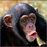

En cuanto a los datos se va a usar los archivos de imagen se va a usar la libreria PIL de python para la edicion de imagen y se van a convertir en una lista de tuplas que contiene los niveles RGB por cada pixel.

In [ ]:
from PIL import Image
#asegurarse de ingresar una direccion valida de localizacion del archivo
dir = '/content/drive/MyDrive/Colab Notebooks/monke.jpg'
img=Image.open(dir)
pixls= img.getdata()
listPixls= list(pixls)
print(listPixls)

[(184, 151, 110), (175, 143, 102), (184, 148, 114), (189, 156, 123), (190, 155, 127), (200, 149, 128), (202, 148, 124), (201, 149, 127), (192, 148, 121), (183, 138, 107), (176, 136, 100), (168, 133, 91), (166, 129, 87), (162, 118, 79), (162, 119, 77), (160, 118, 78), (149, 110, 71), (149, 115, 77), (169, 135, 98), (176, 146, 110), (167, 137, 109), (177, 142, 123), (188, 153, 131), (189, 157, 132), (198, 167, 138), (197, 172, 142), (188, 168, 131), (186, 156, 128), (166, 138, 114), (164, 145, 113), (169, 150, 120), (165, 150, 119), (166, 154, 128), (173, 152, 123), (165, 149, 123), (161, 152, 119), (170, 153, 123), (169, 151, 127), (168, 150, 128), (172, 149, 118), (164, 145, 112), (155, 141, 102), (142, 139, 96), (138, 135, 94), (139, 137, 96), (141, 140, 96), (151, 155, 120), (200, 169, 104), (203, 176, 107), (215, 183, 122), (223, 188, 132), (232, 191, 137), (237, 187, 138), (230, 180, 131), (228, 176, 126), (220, 174, 124), (209, 168, 114), (199, 161, 98), (196, 161, 93), (194, 157,

Primero tenemos que convertir en binario cada valor de del mensaje a encriptar por lo que primero pasaremos cada caracter al codigo ASCII y luego traducirlos al sistema binario, asi mismo necesitaremos un conjunto de caracteres que nos ayude a saber que es el final del mensaje en el proceso de decodificacion, por ejemplo: "*#MD2&*"

In [ ]:
def msg2bin(msg):
  binmsg=[]
  msg2=msg+'#MD2&'
  for i in msg2:
    binmsg.append(bin(ord(i))[2:].zfill(8))
  return binmsg

  
print (msg2bin('Esteganografía'))

['01000101', '01110011', '01110100', '01100101', '01100111', '01100001', '01101110', '01101111', '01100111', '01110010', '01100001', '01100110', '11101101', '01100001', '00100011', '01001101', '01000100', '00110010', '00100110']


Para la codificacion del mensaje usaremos el siguiente algoritmo que será explicado paso a paso dentro del codigo

In [ ]:
def encode(listPixls,binmsg):
  lp = []
  bm = []
  ml = []
  #pasamos la lista de tuplas a una sola lista
  for i in listPixls:
    for j in range(3):
      lp.append(i[j])
  #pasamos la lista de strings binarios a una sola lista
  for i in binmsg:
    for j in range(8):
      bm.append(i[j])
  #Miramos si el ultimo bit del canal de color de cada pixel es igual al bit a encriptar en caso de que no lo sea le sumamos 1
  for i in range(len(bm)):
    if str(lp[i]%2)==bm[i]:
      ml.append(lp[i])
    else:
      ml.append(lp[i]+1)
  #Agregamos los bits que no cambiaron durante la encriptacion
  for i in lp[len(bm):]:
    ml.append(i)
  #pasamos la lista resultante a una lista de tuplas que cumpla con el resultado inicial 
  it = iter(ml)
  fl=list(zip(it, it, it))
  return fl

listpxlsmod=encode(listPixls,msg2bin('Esteganografía'))
print(listpxlsmod)


[(184, 151, 110), (176, 144, 103), (184, 149, 114), (189, 157, 123), (190, 156, 127), (201, 150, 129), (203, 149, 124), (201, 150, 128), (192, 149, 121), (184, 138, 107), (176, 137, 100), (169, 133, 92), (166, 129, 87), (163, 118, 79), (163, 120, 78), (160, 118, 79), (150, 111, 71), (150, 115, 77), (169, 136, 98), (177, 147, 110), (167, 137, 109), (177, 142, 123), (189, 154, 132), (189, 157, 133), (198, 167, 139), (197, 172, 142), (189, 168, 132), (187, 157, 128), (166, 138, 114), (165, 146, 113), (169, 150, 120), (165, 151, 120), (167, 155, 129), (174, 153, 123), (166, 149, 124), (161, 153, 120), (170, 154, 124), (169, 152, 128), (169, 150, 128), (172, 149, 119), (164, 145, 112), (156, 141, 103), (142, 139, 96), (139, 136, 94), (140, 137, 96), (142, 140, 96), (151, 155, 120), (200, 169, 104), (204, 176, 107), (216, 184, 123), (223, 188, 132), (232, 191, 137), (237, 187, 138), (230, 180, 131), (228, 176, 126), (220, 174, 124), (209, 168, 114), (199, 161, 98), (196, 161, 93), (194, 157,

Como ultimo paso para la codificación procedemos a crear la nueva imagen esteganográfica

In [ ]:
img2 = Image.new(img.mode, img.size)
img2.putdata(listpxlsmod)
img2.save('/content/drive/MyDrive/Colab Notebooks/monke2.jpeg')

Imagen original

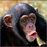

Imagen modificada

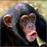

In [ ]:
def decode(listpxlsmod):
  finchar='#MD2&'
  lpm = []
  mod = []
  mod2 = []
  modf = []
  asciilst=[]
  st=""
#pasamos la lista de tuplas a una sola lista  
  for i in listpxlsmod:
    for j in range(3):
      lpm.append(i[j])
#guardamos en una lista todos los bits menos significativos mediante el mododulo 2 de cada entero
  for i in lpm:
    mod.append(str(i%2))
#agrupamos los numeros en tuplas de 8
  it = [iter(mod)] * 8
  mod2 = list(zip(*it))
#convertimos dichas tuplas a strings binarios
  for i in mod2:
    bintup =  ''.join(i)
    modf.append(bintup)
#convertimos los numeros binarios a su respectivo caracter ASCII
  for i in modf:
    asciilst.append(chr(int(i,2)))
#agregamos dichos caracteres a un string
  for i in asciilst:
    st+=i
#buscamos el indice en el que se encuentra la subcadena que marca el final del mensaje '#MD2&
#e imprimimos todo lo anterior a él
  return st[:st.find(finchar)]

d=decode(listpxlsmod)
print(d)


Esteganografía


# Conclusiones 

*   Este proyecto de la esteganografía nos ayuda a esclarecer una función práctica de todo el desrrollo teórico de la aritmética modular y la alta complejidad que podrian alcanzar estos sistemas.

*   Es importande diferenciar la diferencia entre la criptografia y la esteganografía ya que en la primera es visible que hay un conjunto de información alterado para no ser decifrado. Mientras que en la segunda es imposible saber apriori que hay información oculta.

*   Un mayor estudio de esta area podria revolucionar la ciberseguridad como la conocemos y lograr nuevos descubrimientos para mejorar aspectos como la privacidad, pero asimismo puede ser un arma potencial para atentar contra los mismos.

# Referencias

>*Minati M., Ashanta R. R., Sunit K.:High Security Image Steganography with Modified Arnold’s Cat Map (2012)*
>
>*Andreas Westfeld, Andreas Pfitzmann: Attacks on Steganographic Systems
Breaking the Steganographic Utilities EzStego, Jsteg,
Steganos, and S-Tools—and Some Lessons Learned*